In [2]:
import pandas as pd
import os 
import zipfile
import kaggle # uncomment this for use in local machine


In [3]:
import opendatasets as od

In [4]:
!kaggle datasets list

ref                                                         title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                           Chocolate Sales Data 📊🍫                            14473  2025-03-19 03:51:40                 17437        297  1.0              
adilshamim8/student-depression-dataset                      Student Depression Dataset                        467020  2025-03-13 03:12:30.423000           8584        126  1.0              
meleknur/global-internet-usage-by-country-2000-2023         Global Internet Usage by Country (2000-2023)       17617  2025-03-25 15:34:00.883000           1479         22  1.0              
abdulmalik1518/mobiles-dataset-2025               

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
torch.manual_seed(43)

In [7]:
df = pd.read_csv('fmnist_small.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fmnist_small.csv'

In [19]:
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,130,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,1,3,0,0,0,...,80,77,83,45,0,0,0,1,0,0


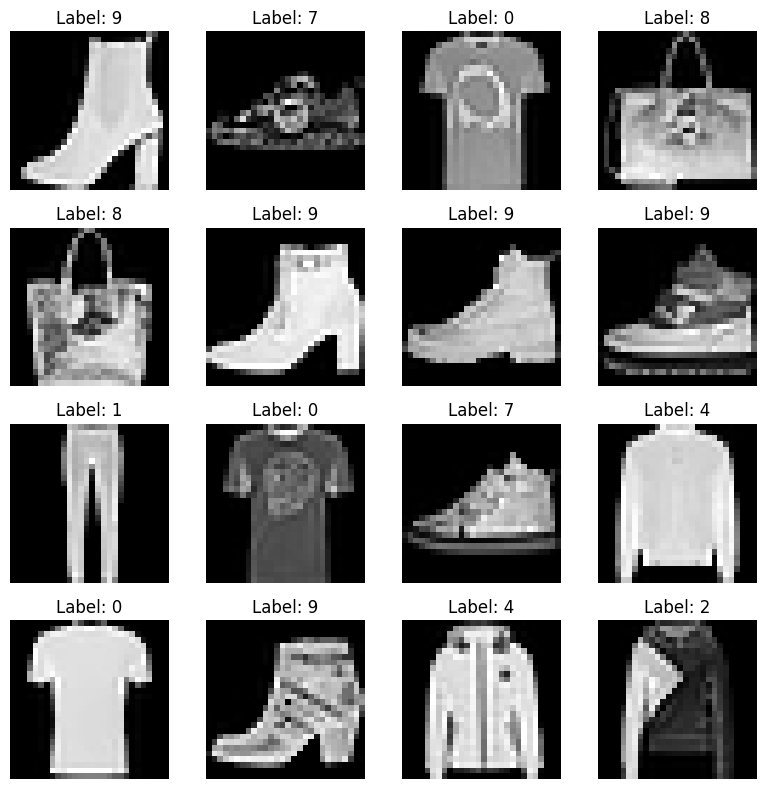

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape the pixel values into 28x28
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {df.iloc[i, 0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [24]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train = X_train/255.0  # Normalize pixel values to [0, 1]
X_test = X_test/255.0  # Normalize pixel values to [0, 1]

In [33]:
#Create a custom dataset class

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]    

In [34]:
# Create train dataset and test dataset object
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [36]:
len(train_dataset), len(test_dataset)

(4800, 1200)

In [37]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [38]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define NN class
class myNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            
        )
    
    def forward(self, x):
        return self.model(x)


In [58]:
learning_rate = 0.1
epochs = 200

In [59]:
model = myNN(X_train.shape[1])
#loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [60]:
# Training loop
for epochs in range(epochs):
    total_epoch_loss = 0.0

    for batch_features, batch_labels in train_loader:
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f"Epoch {epochs+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 1.3767
Epoch 2, Loss: 0.7763
Epoch 3, Loss: 0.6618
Epoch 4, Loss: 0.5958
Epoch 5, Loss: 0.5336
Epoch 6, Loss: 0.5015
Epoch 7, Loss: 0.4816
Epoch 8, Loss: 0.4411
Epoch 9, Loss: 0.4217
Epoch 10, Loss: 0.4041
Epoch 11, Loss: 0.3856
Epoch 12, Loss: 0.3704
Epoch 13, Loss: 0.3479
Epoch 14, Loss: 0.3439
Epoch 15, Loss: 0.3204
Epoch 16, Loss: 0.3020
Epoch 17, Loss: 0.3069
Epoch 18, Loss: 0.2840
Epoch 19, Loss: 0.2699
Epoch 20, Loss: 0.2733
Epoch 21, Loss: 0.2537
Epoch 22, Loss: 0.2402
Epoch 23, Loss: 0.2400
Epoch 24, Loss: 0.2251
Epoch 25, Loss: 0.2186
Epoch 26, Loss: 0.2251
Epoch 27, Loss: 0.2043
Epoch 28, Loss: 0.2079
Epoch 29, Loss: 0.1991
Epoch 30, Loss: 0.1879
Epoch 31, Loss: 0.1846
Epoch 32, Loss: 0.1825
Epoch 33, Loss: 0.1653
Epoch 34, Loss: 0.1527
Epoch 35, Loss: 0.1534
Epoch 36, Loss: 0.1501
Epoch 37, Loss: 0.1456
Epoch 38, Loss: 0.1518
Epoch 39, Loss: 0.1444
Epoch 40, Loss: 0.1747
Epoch 41, Loss: 0.1269
Epoch 42, Loss: 0.1265
Epoch 43, Loss: 0.1482
Epoch 44, Loss: 0.12

In [63]:
model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [61]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8433333333333334


In [62]:
len(test_loader)

38